In [126]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st 

import statsmodels.api as sm 
import statsmodels.formula.api as smf

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Plot styling
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [127]:
# extract_data(benchmark)
#
# This function extracts the interesting data columns for the given benchmark
# program and returns a dataframe with these columns.
def extract_data(benchmark):
    
    int_2006 = processors[processors[benchmark].notnull()]
    int_2006 = int_2006.reset_index(drop=True)
    perf = int_2006[benchmark]

    max_perf = max(int_2006[benchmark])
    min_perf = min(int_2006[benchmark])
    range_perf = max_perf - min_perf
    nperf = perf.apply(lambda x: 100*(x - min_perf) / range_perf)

    clock = int_2006["Processor Clock [MHz]"]
    threads = int_2006["Threads/core"]
    cores = int_2006["Cores"]
    TDP = int_2006["TDP"]
    transistors = int_2006["Transistors (millions)"]
    dieSize = int_2006["Die size (mm^2)"]
    voltage = int_2006["Voltage (low)"]
    featureSize = int_2006["Feature Size [microns]"]
    channel = int_2006["Channel length [microns]"]
    FO4delay = int_2006["FO4 Delay [ps]"]
    L1icache = int_2006["L1 (instruction) (on chip)"]
    L1dcache = int_2006["L1 (data) (on chip)"]
    L2cache = int_2006["L2 (on chip)"]
    L3cache = int_2006["L3 (on chip)"]

    data_frame = pd.DataFrame(dict(nperf= nperf, perf=perf, clock = clock, threads = threads, cores = cores, TDP = TDP,
                                transistors = transistors, dieSize = dieSize, voltage = voltage, featureSize = featureSize,
                                channel = channel, FO4delay = FO4delay, L1icache = L1icache, L1dcache = L1dcache,
                                L2cache = L2cache, L3cache = L3cache))
    return(data_frame)

# Project2: Simple Regression

In this project, we apply simple linear regression on the **CPU info** dataset (given in Lab2). Our aim is to forecast the variable $y$ from a variable $x$, assuming a linear relationship between these two variables:

$$y = \beta_0 + \beta_1 x + \varepsilon .$$

In our case, we use the CPU's **Thermal Design Power** (TDP) as the indepented variable and **CPU's Clock Frequency** as the dependent variable. Thus, we want to predict the clock frequency of a CPU, given its TDP.

First we need to estimate the parameters $beta_0$ and $beta_1$, which are the intercept and the slope of the line respectively. To do so, we use the *lm* function as follows:
 


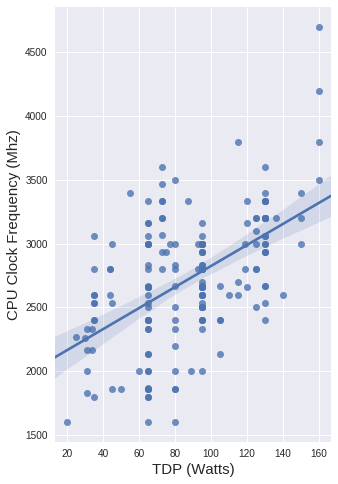

In [128]:
# Read the dataset
processors = pd.read_csv('all-data.csv', sep=",", header=0) # ye, ye, we know. 'sep' argument is optional in this case

# Extract data from a specific benchmark
cpu_info = extract_data("SpecInt2006 (average base)")

# For the sake of simplicity
x = cpu_info['TDP']
y = cpu_info['clock']

# Calculate and plot the linear model fit
fit = smf.ols('clock ~ TDP',data = cpu_info ).fit()
fit.summary()

# Plot (x,y) points from the dataset
sns.pairplot(cpu_info, x_vars=['TDP'], y_vars='clock', size=7, aspect=0.7, kind='reg')
plt.xlabel('TDP (Watts)')
plt.ylabel('CPU Clock Frequency (Mhz)')
plt.show()

Below we can see some of the rows in the dataset. The CPU's designer, family and model are shown for reference purposes only. The important parts are the CPU clock frequency and TDP values.

In [129]:
cpu_info.head()

,FO4delay,L1dcache,L1icache,L2cache,L3cache,TDP,channel,clock,cores,dieSize,featureSize,nperf,perf,threads,transistors,voltage
0,NaN,NaN,NaN,NaN,NaN,80.0,NaN,2400.0,4.0,NaN,NaN,51.341351,33.50,2.0,NaN,0.6
1,NaN,NaN,NaN,NaN,NaN,60.0,NaN,2000.0,6.0,NaN,NaN,55.596670,35.80,2.0,NaN,0.6
2,NaN,NaN,NaN,NaN,NaN,80.0,NaN,2200.0,4.0,NaN,NaN,46.160962,30.70,1.0,NaN,0.6
3,19.08,64.0,64.0,512.0,NaN,NaN,0.053,1200.0,1.0,NaN,0.09,0.000000,5.75,1.0,NaN,NaN
4,19.08,64.0,64.0,1024.0,NaN,110.0,0.053,2600.0,2.0,199.0,0.09,8.048104,10.10,1.0,233.0,1.3


In [130]:

# Apply the cor function to estimate the goodness of fit
np.corrcoef(x,y) # We can usee correlate(x,y) or corrcoef(x,y)


array([[ nan,  nan],
       [ nan,   1.]])

In [131]:
print("R-Squared value: ", fit.rsquared)

R-Squared value:  0.288069562677


In [132]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  clock   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     74.45
Date:                Wed, 25 Oct 2017   Prob (F-statistic):           2.87e-15
Time:                        20:27:51   Log-Likelihood:                -1385.0
No. Observations:                 186   AIC:                             2774.
Df Residuals:                     184   BIC:                             2781.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1999.9619     89.452     22.358      0.000      1823.478  2176.446
TDP            8.2351      0.954      8.629      0.000         6.352    10.118
==============================================================================
Omnibus:                        1.572   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.223
Skew:                           0.176   Prob(JB):                        0.543
Kurtosis:                       3.183   Cond. No.                         274.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated regression line is: $\hat{y} = 1999.9619 + 8.2351x.$

Intercept: $\hat{\beta}_0=1999.9619$. A processor that has a thermal design power equal to $0$ watts will have a clock frequency of $~2000$ MHz.

Slope: $\hat{\beta}_1=8.2351$. For every extra watt, the clock frequency is increased on average by $8.24$ Mhz. Alternatively, if two CPUS differ by $1$ watt (in their TDPs), their clock frequency will differ on average by $8.24$ MHz.


## Residual plots

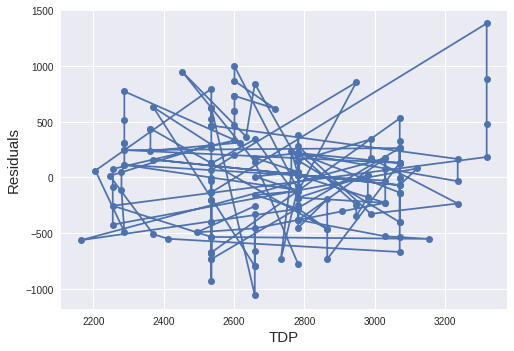

In [133]:
cpu_fitted = fit.fittedvalues
cpu_residuals = fit.resid # Get residuals of fit

x1, y1 = [0, 0], [3400, 1500] # For abline use

plt.plot(cpu_fitted,cpu_residuals , marker = 'o')
plt.ylabel('Residuals')
plt.xlabel('TDP')

plt.show()

## Forecasting with regression

Assuming that the regression errors are normally distributed, an approximate 95% **forecast interval** (also called a prediction interval) associated with this forecast is given by 

$$\hat{y} \pm 1.96 s_e\sqrt{1+\frac{1}{N}+\frac{(x-\bar{x})^2}{(N-1)s_x^2}},$$

***

The forecast interval is wider when $x$ is far from $\bar{x}$. That is, we are more certain about our forecasts when considering values of the predictor variable close to its sample mean.

For a CPU with TDP equal to $100$ watts, the average clock frequency forecasted is $\hat{y}=2568.74$ MHz. The corresponding 95% forecast interval is $\lbrack 4.95, 6.84 \rbrack$ (calculated using R).

For a car with City driving fuel economy $x=30$ mpg, the average footprint forecasted is $\hat{y}=5.90$ tons of CO$_2$ per year. The corresponding 95% forecast interval is $\lbrack 1998.353, 3648.6 \rbrack$ (calculated using R).

***

In [161]:
#fcast <- forecast(fit, newdata=data.frame(TDP=100))
#fcast
#plot(fcast, xlab="TDP (Watts)", ylab="CPU Clock Frequency (Mhz)")

#fit.predict(TDP = 100)
#fit = smf.ols('clock ~ TDP',data = cpu_info ).fit()
#fit.predict(Xnew)
#
#X_new = cpu_info.DataFrame({'TDP': 100})
#fit.predict(X_new)

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

## P-value:
To determine how big the difference between $\hat{\beta}_1$ and $\beta_1$ must be before we would reject the null hypothesis, we calculate the probability of obtaining a value of $\beta_1$ as large as we have calculated if the null hypothesis were true. This probability is known as the P-value

**scikit-learn's LinearRegression doesn't calculate P-value but you can easily extend the class to do it:**
```
from sklearn import linear_model
from scipy import stats
import numpy as np


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """

    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False
        super(LinearRegression, self)\
                .__init__(*args, **kwargs)

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)

        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([
            np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X))))
                                                    for i in range(sse.shape[0])
                    ])

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        return self
```

## Confidence intervals

It is also sometimes useful to provide an interval estimate for $\beta_1$, usually referred to as a *confidence interval* (and not to be confused with a forecast or prediction interval).


In [135]:
print('Confidence interval: ', fit.conf_int) # Can be seen in fit.summary()

Confidence interval:  <bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7ff8c6ee6ac8>>



If the $100(1-\alpha)\%$ confidence interval for a parameter does not contain 0, then the associated P-value must be less than $\alpha$.


## Non-linear functional forms

Simply transforming variables $y$ and/or $x$ and then estimating a regression model using the transformed variables is the simplest way of obtaining a non-linear specification. 

The most commonly used transformation is the (natural) logarithmic. Recall that in order to perform a logarithmic transformation to a variable, all its observed values must be greater than zero.

A *log-log* functional form is specified as 

$$\log y_i=\beta_0+\beta_1 \log x_i + \varepsilon_i. $$ 


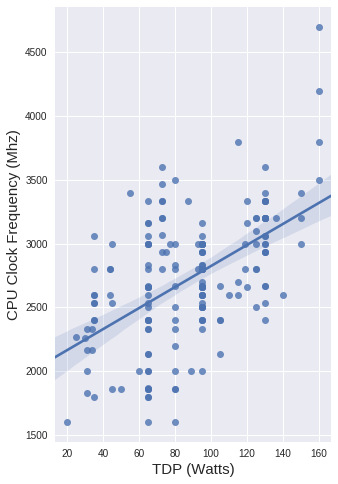

In [136]:
# For the sake of simplicity 
x = cpu_info['TDP']
y = cpu_info['clock']

# Calculate and plot the linear model fit
fit = smf.ols('clock ~ TDP',data = cpu_info ).fit()
fit.summary()

# Plot (x,y) points from the dataset
sns.pairplot(cpu_info, x_vars=['TDP'], y_vars='clock', size=7, aspect=0.7, kind='reg')
plt.xlabel('TDP (Watts)')
plt.ylabel('CPU Clock Frequency (Mhz)')
plt.show()

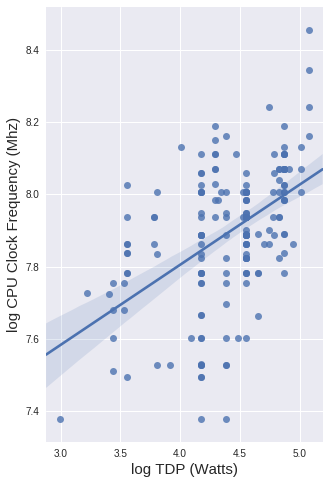

In [137]:
cpu_info_log = extract_data("SpecInt2006 (average base)") # Extract data frame for log-log use

cpu_info_log['TDP'] = np.log(cpu_info_log['TDP']) # Log-Log functional form variable assigning
cpu_info_log['clock'] = np.log(cpu_info_log['clock'])

# For the sake of simplicity
x2 = cpu_info_log['TDP']
y2 = cpu_info_log['clock']

# Calculate and plot the linear model fit
fit2 = smf.ols('clock ~ TDP',data = cpu_info_log).fit()
#fit2.summary()

# Plot (x,y) points from the dataset
sns.pairplot(cpu_info_log, x_vars=['TDP'], y_vars='clock', size=7, aspect=0.7, kind='reg')
plt.xlabel('log TDP (Watts)')
plt.ylabel('log CPU Clock Frequency (Mhz)')
plt.show()

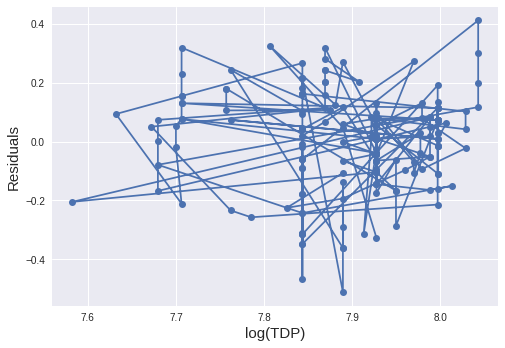

In [145]:
cpu_fitted2 = fit2.fittedvalues
cpu_residuals2 = fit2.resid # Get residuals of fit

plt.plot(cpu_fitted2,cpu_residuals2, marker = 'o')
plt.ylabel('Residuals')
plt.xlabel('log(TDP)')

plt.show()

## Regression with time series data

When using regression for prediction, we are often considering time series data and we are aiming to forecast the future. 

Using a regression model to forecast time series data poses a challenge in that future values of the predictor variable are needed to be input into the estimated model, but these are not known in advance. One solution to this problem is to use *scenario based forecasting*.

**The CPU DB data-set does not have time-series data, so in order to see an example of a regression like this, you can refer to our lab4 with a (pseudo)time-series dataset OR you can look the original example by mr Houstis.
This also applies to the linear trend and the residual autocorellation.**
